TODO: continuar este notebook completando:
- Crea un modelo para clasificar si una flor es de tipo virgínica (```iris.target == 2```) o no lo es (**clasificación binaria**) solo en función de la longitud del pétalo (columna 2 de ```iris.data```).
- Representa gráficamente el modelo y los datos de entrenamiento con ```matplotlib```.
- Calcula y representa cuál sería la predicción del modelo de que una flor con longitud de pétalo de 5 cm sea de tipo virgínica.

1. Solución usando numpy

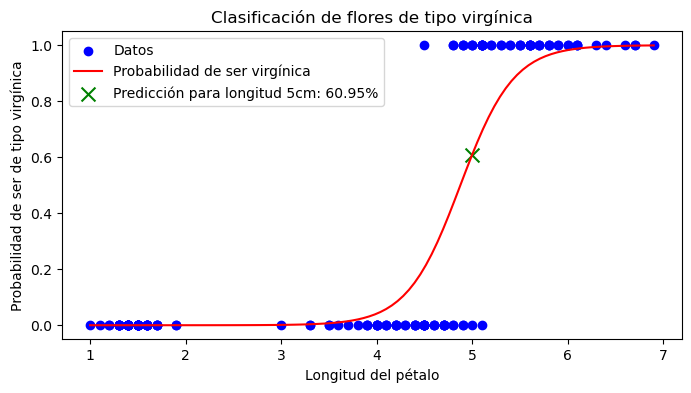

In [9]:
# Solución usando numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_iris
#cargamos el dataset iris
iris = load_iris()

# print(type(iris)) # Tipo de objeto
# print(iris.DESCR) # Información del dataset
# print(type(iris.target)) # Clases de las flores
# print(iris.target_names) # Nombre de las clases
# print(iris.target) # Clases de las flores
# print(iris.feature_names) # Datos de las flores
# print(iris.data) # Datos de las flores

#la longitud del pétalo (atributo 2) es nuestro eje x lo convertimos en columna de valores
x = iris.data[:, 2].reshape(-1, 1)

#y será la clasificación binaria: es de tipo virgínica (target==2) o no (1 sí, 0 no)
y = (iris.target == 2).astype(int)

# creamos el objeto de regresión logística
log_reg = LogisticRegression()

# lo entrenamos con todos los datos
log_reg.fit(x, y)

# Realizar predicciones en todos los datos
predictions = log_reg.predict(x)

# Dibujamos la gráfica con matplotlib
valores_x = np.linspace(x.min(), x.max(), 100).reshape(-1, 1) #creamos un array con los valores máximos y mínimos de longitud del pétalo para el eje de la x
valores_y = log_reg.predict_proba(valores_x) # Calculamos los valores de y para esas longitudes de x (eje y)

plt.figure(figsize=(8, 4))
#pintamos todos los datos
plt.scatter(x, y, color='blue', label='Datos')
#pintamos la curva ()'r-' es lo mismo que color='red')
plt.plot(valores_x, valores_y[:,1], 'r-', label='Probabilidad de ser virgínica')
plt.xlabel('Longitud del pétalo')
plt.ylabel('Probabilidad de ser de tipo virgínica')
plt.title('Clasificación de flores de tipo virgínica')

# Calcular la predicción para una longitud de pétalo de 5 cm
longitud_petalo = 5
array_longitud_petalo = np.array([[longitud_petalo]])
probabilidad = log_reg.predict_proba(array_longitud_petalo)[:, 1]
#para el valor 5 de x, pasamos la probabilidad hallada
plt.scatter(longitud_petalo, probabilidad, color='green', label='Predicción para longitud 5cm: ' + str(round(probabilidad[0]*100,2))+ '%', marker='x', s=100)

plt.legend()
plt.show()

2. Solución usando pandas

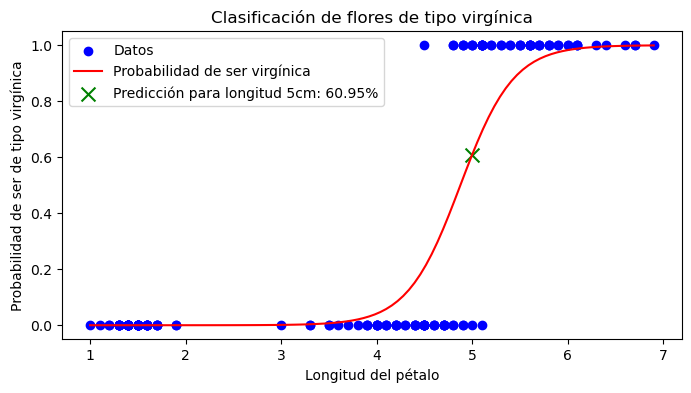

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_iris
# Cargar el conjunto de datos Iris
iris = load_iris()

# print(type(iris)) # Tipo de objeto
# print(iris.DESCR) # Información del dataset
# print(type(iris.target)) # Clases de las flores
# print(iris.target_names) # Nombre de las clases
# print(iris.target) # Clases de las flores
# print(iris.feature_names) # Datos de las flores
# print(iris.data) # Datos de las flores

#creamos el dataframe con los datos del dataset y las columnas
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
#la columna target tendrá el tipo de flor que es 0,1,2
iris_df['target'] = iris.target

#print(iris_df)

# Seleccionamos en el dataframe la columna petal length (cm) para nuestro eje x
x = iris_df['petal length (cm)'].values.reshape(-1, 1)

#y será la clasificación binaria: es de tipo virgínica (target==2) o no (1 sí, 0 no)
y = (iris_df['target'] == 2).astype(int).values

# creamos el objeto de regresión logística
log_reg = LogisticRegression()

# lo entrenamos con todos los datos
log_reg.fit(x, y)

# Dibujamos la gráfica con matplotlib
valores_x = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
valores_y = log_reg.predict_proba(valores_x)

plt.figure(figsize=(8, 4))
#pintamos los puntos de valores
plt.scatter(iris_df['petal length (cm)'], y, color='blue', label='Datos')
#pintamos la curva 
plt.plot(valores_x, valores_y[:, 1], color='red', label='Probabilidad de ser virgínica')
plt.xlabel('Longitud del pétalo')
plt.ylabel('Probabilidad de ser de tipo virgínica')
plt.title('Clasificación de flores de tipo virgínica')

# Calcular la predicción para una longitud de pétalo de 5 cm
longitud_petalo = 5
probabilidad = log_reg.predict_proba([[longitud_petalo]])[:, 1]
plt.scatter(longitud_petalo, probabilidad, color='green', label='Predicción para longitud 5cm: ' + str(round(probabilidad[0]*100,2)) + '%', marker='x', s=100)

plt.legend()
plt.show()

